# **Dataset: Sloan Digital Sky Survey - DR18**

**Universitario:** Patzi Colodro Sarah Valentina

**Nombre del Dataset:**  Sloan Digital Sky Survey - DR18

**URL del Dataset:** https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18

**Temática del Dataset:** clasificacion de objetos astronómicos

**Variables de Entrada: **
* **objid, specobjid:** Identificadores de objetos
* **ra: ** J2000 Ascensión recta
* **dec:** Declinación J2000
* **u, g, r, i y z :** mejor ajuste de magnitud DeV/Exp para u, g, r, i y z. u, g, r, i y z corresponden a las cinco bandas fotométricas, a saber, banda ultravioleta, banda verde, banda roja, banda infrarroja y banda infrarroja cercana, respectivamente.
* run: Número de carrera
* rerun: Número de repetición
* camcol: Columna de cámara
* field: Número de campo
* plate: Número de placa
* mjd: Fecha juliana modificada
* fiberid: Identificación de fibra óptica
* **petroRad_u, petroRad_g, petroRad_r, petroRad_i y petroRad_z :** radios petrosianos para las cinco bandas fotométricas u (ultravioleta), g (verde), r (rojo), i (infrarrojo) y z (infrarrojo cercano) respectivamente
* **petroFlux_u, petroFlux_g, petroFlux_r, petroFlux_i y petroFlux_z :** flujos petrosianos para las cinco bandas fotométricas u (ultravioleta), g (verde), r (rojo), i (infrarrojo) y z (infrarrojo cercano) respectivamente. Estas características describen la cantidad total de luz emitida por los objetos celestes.
* **petroR50_u, petroR50_g, petroR50_r, petroR50_i y petroR50_z :** radios de semiluz petrosianos para las cinco bandas fotométricas u (ultravioleta), g (verde), r (rojo), i (infrarrojo) y z (infrarrojo cercano), respectivamente. PetroR50 es una medida del radio en el que la mitad de la luz total (o flujo) emitida por un objeto celeste está encerrada en la apertura petrosiana.
* **psfMag_u, psfMag_g, psfMag_r, psfMag_i y psfMag_z :** magnitudes de objetos medidas utilizando la función de dispersión de puntos (PSF) en las cinco bandas fotométricas u (ultravioleta), g (verde), r (rojo), i (infrarrojo) y z (infrarrojo cercano) respectivamente.
* **expAB_u, expAB_g, expAB_r, expAB_i y expAB_z :** relación de ejes de los ajustes exponenciales al perfil de luz de los objetos celestes observados en las cinco bandas fotométricas u (ultravioleta), g (verde), r (rojo), i (infrarrojo) y z (infrarrojo cercano) respectivamente.
* **redshift:** Corrimiento al rojo final del objeto celeste


**Variable de Salida:** class (STAR,GALAXY,QSO)

**Formato:** 100000 filas × 43 columnas

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importación de librerías para manipulación de datos y gráficos**

In [8]:
# Importa la librería `os` para manipular directorios y rutas de archivos
import os

# Importa la librería `numpy` para cálculos científicos y la llama `np`
import numpy as np

# Importa la librería `pandas` para trabajar con tablas de datos (DataFrames) y la llama `pd`
import pandas as pd

# Importa `pyplot` de `matplotlib` para crear gráficos visuales
from matplotlib import pyplot

# Este comando asegura que los gráficos generados se incrusten directamente en el cuaderno (Jupyter o Colab)
%matplotlib inline

# **Carga y visualización inicial de un dataset**

* Cargamos un dataset desde un archivo CSV:  **pd.read_csv():**  función de pandas

* Muestra el DataFrame:  **display():** Función de pandas

* Mostramos información básica sobre sus dimensiones (número de filas y columnas):  **data.shape:** propiedad de pandas.

* Se seleccionan 100 filas al azar para visualizar una pequeña parte del conjunto de datos: **data.sample():** Función de pandas

In [9]:
# Cargamos el dataset en un DataFrame usando PANDAS:
# El argumento 'delimiter' indica que las columnas están separadas por comas
data = pd.read_csv('/content/drive/MyDrive/IA/LaboratoriosOficiales/Lab4-PatziColodroSarahValentina/SDSS_DR18.csv', delimiter=',')


# Muestra el dataset cargado
display(data)


# Muestra las dimensiones del dataset (número de filas, número de columnas)
print('Fomato:', data.shape)


#Muestra 100 filas aleatorias del dataset para obtener una vista rápida de los datos
data.sample(n=100)

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,...,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,...,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,...,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501,GALAXY
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,...,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400,STAR


Fomato: (100000, 43)


,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
89763,1.240000e+18,6.580000e+17,217.077922,4.326023,19.53269,17.47446,16.41697,15.88724,15.45392,1478,...,18.70054,17.19807,16.72578,0.476448,0.553438,0.479786,0.475391,0.455739,0.085761,GALAXY
41621,1.240000e+18,8.480000e+17,5.795703,15.388985,18.09458,16.72854,15.98188,15.49378,15.18105,1904,...,18.41961,17.16745,16.81401,0.312064,0.353152,0.360592,0.341298,0.334420,0.057137,GALAXY
56846,1.240000e+18,7.390000e+17,10.654906,-9.038790,19.37867,18.15410,17.60504,17.26725,17.05172,1729,...,20.04838,19.08507,18.77947,0.381949,0.400555,0.415686,0.411905,0.393381,0.077307,GALAXY
61787,1.240000e+18,6.850000e+17,221.593465,60.360035,18.81318,17.74193,17.24234,16.88797,16.72201,2078,...,18.80623,17.95367,17.90519,0.419370,0.507525,0.487915,0.505701,0.471194,0.066688,GALAXY
56602,1.240000e+18,7.380000e+17,9.817506,-9.072718,18.46276,16.96554,16.23165,15.85609,15.55185,1729,...,19.40411,18.19189,17.87485,0.275612,0.231602,0.237189,0.239091,0.220334,0.037277,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86297,1.240000e+18,3.530000e+18,8.816567,15.147228,18.94660,17.45097,16.83380,16.58196,16.45575,1035,...,17.47700,16.57694,16.47363,0.575075,0.992464,0.999994,0.818472,0.568572,-0.000624,STAR
6453,1.240000e+18,7.840000e+18,185.274440,68.653324,18.62712,16.93921,16.07743,15.66222,15.31171,1412,...,18.96928,17.64467,17.20003,0.786369,0.681574,0.666969,0.708426,0.745873,0.115703,GALAXY
97221,1.240000e+18,8.780000e+17,189.037805,63.649096,17.89570,16.94492,16.66556,16.58405,16.54868,2304,...,16.97697,16.58453,16.54468,0.985305,0.869617,0.922518,0.349682,0.766263,-0.000409,STAR
8527,1.240000e+18,1.410000e+19,139.269853,0.887380,19.43029,19.09757,19.05598,18.89490,18.96973,1239,...,19.09874,18.90200,18.97489,0.134945,0.794913,0.947345,0.999724,0.389910,1.526016,QSO


# **Crear Dataset Sintetico**

## **Duplicación y modificación de datos en un dataset**

Duplicamos el dataset existente, añadiendo variaciones aleatorias (**Ruido**) a las columnas numéricas para crear una versión sintética del conjunto de datos. Luego, combina las versiones originales y modificadas en un solo DataFrame.

* **Ruido**: Es una pequeña variación aleatoria añadida a los valores numéricos para simular nuevos datos o variabilidad.
Ejemplo: si tienes un valor numérico 10 y añades un 2% de ruido, el nuevo valor podría ser algo cercano, como 10.2 o 9.8
* **Columnas numéricas**: Se les añade ruido porque las variaciones numéricas son razonables (ej. magnitudes de estrellas).
* **Columnas categóricas:** No se les añade ruido porque representan categorías fijas o identificadores que no pueden cambiar sin perder su significado.

In [10]:
# Carga el dataset en el DataFrame llamado df_sintetico
df_sintetico= pd.read_csv('/content/drive/MyDrive/IA/LaboratoriosOficiales/Lab4-PatziColodroSarahValentina/SDSS_DR18.csv', delimiter=',')


# Definimos las columnas numéricas para variar el valor duplicado y categóricas:

#(lista con las columnas que contienen valores numéricos que serán modificados)
numeric_columns = ['specobjid','ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
                   'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g',
                   'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g',
                   'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r',
                   'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r',
                   'expAB_i', 'expAB_z', 'redshift']

#(lista con las columnas categóricas que no serán modificadas)
categorical_columns = ['class', 'objid', 'run', 'rerun', 'camcol', 'field',
                       'plate', 'mjd', 'fiberid']


# # Defino una función para añadir las variaciones aleatorias y poder generar nuevas filas con variaciones
def add_noise(series, noise_factor=0.02):

    #Añade una pequeña variación al valor original.
    #noise_factor controla la magnitud de la variación.
    return series * (1 + np.random.normal(0, noise_factor, len(series)))

# Aplica la función add_noise a las columnas numéricas para crear datos modificados
new_data = df_sintetico[numeric_columns].apply(add_noise)

# Se concatena las columnas numéricas modificadas y categóricas originales
new_df_sintetico = pd.concat([new_data, df_sintetico[categorical_columns]], axis=1)

# Se concatena el dataset original con la versión modificada
df_sintetico = pd.concat([df_sintetico, new_df_sintetico], ignore_index=True)

# Imprime las dimensiones del dataset original
print('Dimensiones:', data.shape)
# Imprime las dimensiones del dataset modificado
print('Dimensiones:', df_sintetico.shape)

Dimensiones: (100000, 43)
Dimensiones: (200000, 43)


## **Adición y clasificación de nuevas columnas en un dataset, basadas en las columnas ya existentes**

1. Para la columna: `redshift_alto`

 **¿Qué hace?:** Esta columna clasifica los objetos astronómicos según si su redshift es alto o bajo utilizando valores booleanos:

 **True** = Si el redshift es mayor que 0.1, se considera un redshift alto.
 **False** = Si el redshift es igual o menor que 0.1, se considera un redshift bajo.

2. Para la Magnitud Promedio (`avg_magnitude`)

 **¿Qué hace?:** Calcula la magnitud promedio a partir de las magnitudes en diferentes bandas (psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z). La magnitud promedio es un indicador general del brillo del objeto.

3. Para la columna: `type_of_telescope`

 **¿Qué hace?:** Clasifica el tipo de telescopio necesario para observar el objeto basado en la magnitud promedio calculada en avg_magnitude. Los tipos son:

 **'amateur':** Para magnitudes promedio menores a 6, se necesita un telescopio amateur.

 **'professional':** Para magnitudes promedio de 6 a 16, se necesita un telescopio profesional.

 **'space-based':** Para magnitudes promedio mayores a 16, se necesita un telescopio espacial.

4. Para la columna: `codigo_magnitudes`

 **¿Qué hace?:** Esta columna genera un código único para cada objeto astronómico, combinando el primer dígito de las magnitudes en las bandas `psfMag_u`, `psfMag_g`, `psfMag_r`, `psfMag_i` y `psfMag_z` en una secuencia de caracteres.

5. Para la columna: `luminosity_level`

 **¿Qué hace?:** Clasifica la luminosidad del objeto astronómico en categorías numéricas basadas en la magnitud promedio:

  1 = **Very Low** (magnitud menor que 10)

  2 = **Low** (magnitud de 10 a 14.99)

  3 = **High** (magnitud de 15 a 19.99)

  4 = **Very High** (magnitud de 20 o mayor)


In [11]:
# Crea una columna booleana que indica si el valor de 'redshift' es mayor a 0.1
df_sintetico['redshift_alto'] = df_sintetico['redshift'] > 0.1

# Calcula el promedio de las magnitudes en las bandas (u, g, r, i, z) para cada fila
df_sintetico['avg_magnitude'] = df_sintetico[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z']].mean(axis=1)

# Crea una columna 'type_of_telescope' que clasifica el tipo de telescopio necesario para observar el objeto
# Basado en el promedio de magnitudes ('avg_magnitude')
df_sintetico['type_of_telescope'] = np.where(df_sintetico['avg_magnitude'] < 6, 'amateur',
                                    np.where(df_sintetico['avg_magnitude'] < 16, 'professional', 'space-based'))

# Crea una columna 'codigo_magnitudes' combinando los primeros dígitos de las magnitudes 'psfMag' en las bandas u, g, r, i, z
df_sintetico['codigo_magnitudes'] = df_sintetico.apply(lambda row: ''.join([str(row[f'psfMag_{band}'])[0] for band in ['u', 'g', 'r', 'i', 'z']]), axis=1)


# Defino una función que clasifica la luminosidad basada en el valor de la magnitud promedio
def classify_luminosity(magnitude):
    if magnitude < 10:
        return 1  # Very Low-Muy Baja
    elif magnitude < 15:
        return 2  # Low-Baja
    elif magnitude < 20:
        return 3  # High-Alta
    else:
        return 4  # Very High-Muy Alta

# Crear una columna 'luminosity_level' que indica el nivel de luminosidad basado en la magnitud promedio
df_sintetico['luminosity_level'] = df_sintetico['avg_magnitude'].apply(classify_luminosity)

# Mostrar las primeras filas para verificar las nuevas columnas
print(df_sintetico.head())

          objid     specobjid          ra       dec         u         g  \
0  1.240000e+18  3.240000e+17  184.950869  0.733068  18.87062  17.59612   
1  1.240000e+18  3.250000e+17  185.729201  0.679704  19.59560  19.92153   
2  1.240000e+18  3.240000e+17  185.687690  0.823480  19.26421  17.87891   
3  1.240000e+18  2.880000e+18  185.677904  0.768362  19.49739  17.96166   
4  1.240000e+18  2.880000e+18  185.814763  0.776940  18.31519  16.83033   

          r         i         z  run  ...   expAB_r   expAB_i   expAB_z  \
0  17.11245  16.83899  16.70908  756  ...  0.520474  0.508502  0.488969   
1  20.34448  20.66213  20.59599  756  ...  0.403072  0.999874  0.189495   
2  17.09593  16.65159  16.35329  756  ...  0.770897  0.778642  0.736771   
3  17.41269  17.20545  17.11567  756  ...  0.745611  0.399718  0.986137   
4  16.26352  16.06320  15.97527  756  ...  0.723526  0.712259  0.527055   

   redshift   class  redshift_alto  avg_magnitude  type_of_telescope  \
0  0.041691  GALAXY       

## **Graficar comparaciones de la relación entre 2 magnitudes en el dataset original y en el dataset sintético.**

 Creamos 2 gráficos de dispersión (scatter plots) para comparar cómo se relacionan las magnitudes u y g tanto en el dataset original como en el dataset sintético generado.
 * El primer gráfico muestra los datos originales en azul, y el segundo gráfico muestra los datos sintéticos en naranja.
 * De esta manera, se puede visualizar la diferencia o similitud en la distribución de los valores de u y g entre los dos datasets.

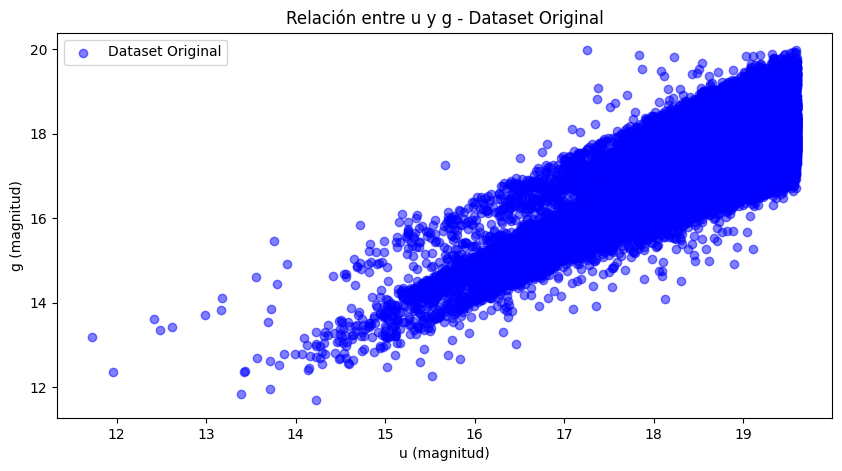

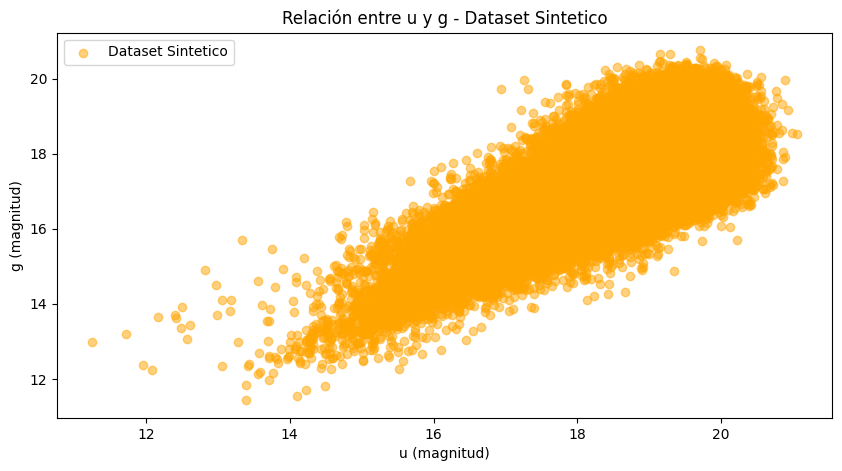

In [12]:
# Importa la biblioteca para crear gráficos
import matplotlib.pyplot as plt

# Gráfico del dataset original
plt.figure(figsize=(10, 5)) # Crea una figura de 10x5 pulgadas
plt.scatter(data['u'], data['g'], alpha=0.5, label='Dataset Original', color='blue') # Grafica los puntos del dataset original (eje x = 'u', eje y = 'g')
plt.title('Relación entre u y g - Dataset Original') # Añade un título al gráfico
plt.xlabel('u (magnitud)') # Etiqueta el eje X
plt.ylabel('g (magnitud)') # Etiqueta el eje Y
plt.legend() # Muestra la leyenda que indica qué representa el gráfico
plt.show() # Muestra el gráfico


# Gráfico del dataset duplicado
plt.figure(figsize=(10, 5)) # Crea otra figura de 10x5 pulgadas para el segundo gráfico
plt.scatter(df_sintetico['u'], df_sintetico['g'], alpha=0.5, color='orange', label='Dataset Sintetico') # Grafica los puntos del dataset sintético (eje x = 'u', eje y = 'g')
plt.title('Relación entre u y g - Dataset Sintetico')  # Añade un título al gráfico
plt.xlabel('u (magnitud)') # Etiqueta el eje X
plt.ylabel('g (magnitud)') # Etiqueta el eje Y
plt.legend() # Muestra la leyenda que indica qué representa el gráfico
plt.show() # Muestra el gráfico


 Creamos 2 gráficos de dispersión (scatter plots) para comparar cómo se relacionan las magnitudes r y i tanto en el dataset original como en el dataset sintético generado.
 * El primer gráfico muestra los datos originales en azul, y el segundo gráfico muestra los datos sintéticos en naranja.
 * De esta manera, se puede visualizar la diferencia o similitud en la distribución de los valores de u y g entre los dos datasets.

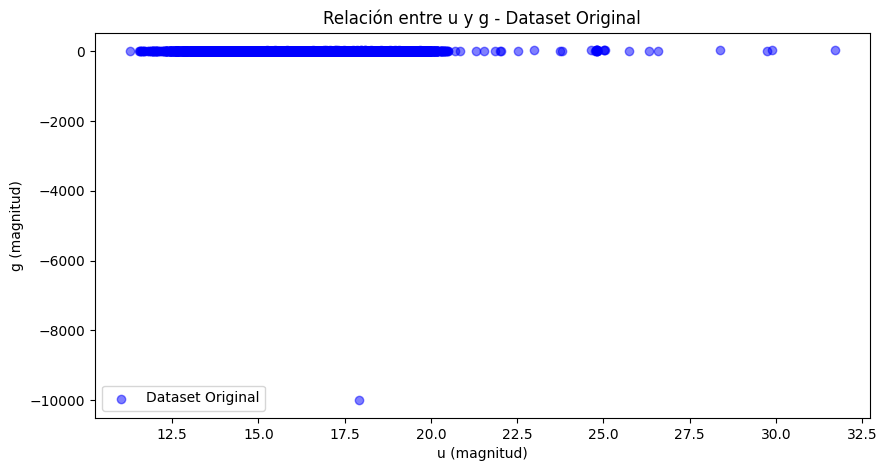

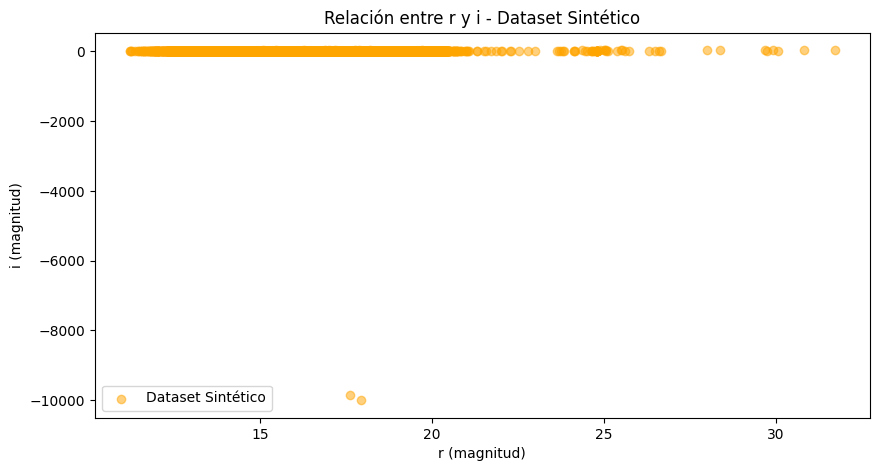

In [13]:
# Gráfico del dataset original
plt.figure(figsize=(10, 5))
plt.scatter(data['r'], data['i'], alpha=0.5, label='Dataset Original', color='blue')
plt.title('Relación entre u y g - Dataset Original')
plt.xlabel('u (magnitud)')
plt.ylabel('g (magnitud)')
plt.legend()
plt.show()

# Gráfico del dataset duplicado
plt.figure(figsize=(10, 5))
plt.scatter(df_sintetico['r'], df_sintetico['i'], alpha=0.5, color='orange', label='Dataset Sintético')
plt.title('Relación entre r y i - Dataset Sintético')
plt.xlabel('r (magnitud)')
plt.ylabel('i (magnitud)')
plt.legend()
plt.show()

**Muestra los tipos de datos de cada columna en el DataFrame df_sintetico:**

Se puede ver que unas columnas aparecen como tipo object, debido a esto posteriormente vamos a convertir los datos.

In [14]:
print(df_sintetico.dtypes)

objid                float64
specobjid            float64
ra                   float64
dec                  float64
u                    float64
g                    float64
r                    float64
i                    float64
z                    float64
run                    int64
rerun                  int64
camcol                 int64
field                  int64
plate                  int64
mjd                    int64
fiberid                int64
petroRad_u           float64
petroRad_g           float64
petroRad_i           float64
petroRad_r           float64
petroRad_z           float64
petroFlux_u          float64
petroFlux_g          float64
petroFlux_i          float64
petroFlux_r          float64
petroFlux_z          float64
petroR50_u           float64
petroR50_g           float64
petroR50_i           float64
petroR50_r           float64
petroR50_z           float64
psfMag_u             float64
psfMag_r             float64
psfMag_g             float64
psfMag_i      

## **Conversión de Datos Categóricos a Numéricos en el Dataset**

Convertimos las columnas categóricas y booleanas en números para facilitar el análisis y procesamiento de datos. Al hacerlo, se asigna un número único a cada valor distinto en las columnas, convirtiendo datos no numéricos en un formato que puede ser utilizado.

* df_sintetico['class']: dato que queremos convertir de valores categóricos a valores numéricos.
* class_unique: Permite ver qué valores únicos se convirtieron en cada número entero.
* pd.factorize:  es una función de la biblioteca pandas que convierte valores únicos en números enteros.

  
* dict(...): convierte el resultado de enumerate en un diccionario.
*enumerate(class_unique): Agrega un índice numérico a cada elemento en la lista class_unique, generando una secuencia de pares

In [15]:
# Convertir 'class' a números
df_sintetico['class'], class_unique = pd.factorize(df_sintetico['class'])
print(f'Clases únicas y sus números: {dict(enumerate(class_unique))}')

# Convertir 'type_of_telescope' a números
df_sintetico['type_of_telescope'], telescope_unique = pd.factorize(df_sintetico['type_of_telescope'])
print(f'Tipos de telescopio únicos y sus números: {dict(enumerate(telescope_unique))}')

# Convertir 'redshift_alto' a números
df_sintetico['redshift_alto'], redshift_alto_unique = pd.factorize(df_sintetico['redshift_alto'])
print(f'Tipos de telescopio únicos y sus números: {dict(enumerate(redshift_alto_unique))}')

# Convertir 'codigo_magnitudes' a números
df_sintetico['codigo_magnitudes'], codigo_magnitudes_unique = pd.factorize(df_sintetico['codigo_magnitudes'])
print(f'codigo_magnitudes y sus números: {dict(enumerate(codigo_magnitudes_unique))}')



Clases únicas y sus números: {0: 'GALAXY', 1: 'STAR', 2: 'QSO'}
Tipos de telescopio únicos y sus números: {0: 'space-based', 1: 'professional', 2: 'amateur'}
Tipos de telescopio únicos y sus números: {0: False, 1: True}
codigo_magnitudes y sus números: {0: '21111', 1: '11222', 2: '11111', 3: '22111', 4: '22221', 5: '22211', 6: '22222', 7: '11212', 8: '12111', 9: '11122', 10: '11112', 11: '11211', 12: '11121', 13: '22122', 14: '21211', 15: '21222', 16: '21121', 17: '22212', 18: '22121', 19: '11221', 20: '12222', 21: '21221', 22: '22112', 23: '21122', 24: '12122', 25: '21212', 26: '12121', 27: '12221', 28: '21112', 29: '1111-', 30: '221--', 31: '2221-', 32: '12211', 33: '12112', 34: '2211-'}


In [16]:
#Comparativa de dimensiones
print('Dimensiones:', data.shape)
print('Dimensiones:', df_sintetico.shape)
print(df_sintetico.head())

Dimensiones: (100000, 43)
Dimensiones: (200000, 48)
          objid     specobjid          ra       dec         u         g  \
0  1.240000e+18  3.240000e+17  184.950869  0.733068  18.87062  17.59612   
1  1.240000e+18  3.250000e+17  185.729201  0.679704  19.59560  19.92153   
2  1.240000e+18  3.240000e+17  185.687690  0.823480  19.26421  17.87891   
3  1.240000e+18  2.880000e+18  185.677904  0.768362  19.49739  17.96166   
4  1.240000e+18  2.880000e+18  185.814763  0.776940  18.31519  16.83033   

          r         i         z  run  ...   expAB_r   expAB_i   expAB_z  \
0  17.11245  16.83899  16.70908  756  ...  0.520474  0.508502  0.488969   
1  20.34448  20.66213  20.59599  756  ...  0.403072  0.999874  0.189495   
2  17.09593  16.65159  16.35329  756  ...  0.770897  0.778642  0.736771   
3  17.41269  17.20545  17.11567  756  ...  0.745611  0.399718  0.986137   
4  16.26352  16.06320  15.97527  756  ...  0.723526  0.712259  0.527055   

   redshift  class  redshift_alto  avg_magnitu

# **Separar datos del dataset**

## Conversión de DataFrame a Array NumPy y Selección de Columnas para Modelado

In [17]:
#Convierte el dataset de pandas a un array de NumPy
df_sintetico = np.array(df_sintetico)  # Asegúrate de que los datos ya están en formato NumPy

# Seleccionar todas las columnas excepto la 43, esa la elimina (índice 42 en Python)
X = np.delete(df_sintetico, 42, axis=1)

# Seleccionar solo la columna 43
y = df_sintetico[:, 42]

# Imprimir las primeras filas de X y y
print(X[:2])
print(y[:10])


[[ 1.24000000e+18  3.24000000e+17  1.84950869e+02  7.33067869e-01
   1.88706200e+01  1.75961200e+01  1.71124500e+01  1.68389900e+01
   1.67090800e+01  7.56000000e+02  3.01000000e+02  5.00000000e+00
   4.62000000e+02  2.88000000e+02  5.20000000e+04  4.56000000e+02
   7.28240200e+00  7.00457600e+00  6.85597600e+00  7.11274900e+00
   6.93096000e+00  3.06639300e+01  9.51174900e+01  1.81718400e+02
   1.46991600e+02  2.07027300e+02  3.83291100e+00  3.65907700e+00
   3.48661700e+00  3.62175300e+00  3.60674400e+00  2.11189100e+01
   1.95032400e+01  1.99635200e+01  1.92514500e+01  1.90523000e+01
   4.79021500e-01  5.18482800e-01  5.20473500e-01  5.08501600e-01
   4.88969300e-01  4.16910600e-02  0.00000000e+00  1.97778840e+01
   0.00000000e+00  0.00000000e+00  3.00000000e+00]
 [ 1.24000000e+18  3.25000000e+17  1.85729201e+02  6.79703907e-01
   1.95956000e+01  1.99215300e+01  2.03444800e+01  2.06621300e+01
   2.05959900e+01  7.56000000e+02  3.01000000e+02  5.00000000e+00
   4.67000000e+02  2.8900

## **Separar en entrenamiento y prueba**

* X.shape[0]: devuelve el número de filas en X, que es el tamaño total del dataset.

In [18]:
#Define el porcentaje del dataset que se usará para el conjunto de prueba, el tamaño del conjunto de prueba (20%),
test_size = 0.2

# Establece una semilla para la generación de números aleatorios.
np.random.seed(42)

# Crea un conjunto de índices en un orden aleatorio, lo cual permite mezclar los datos de manera aleatoria antes de dividirlos en conjuntos de entrenamiento y prueba
indices = np.random.permutation(X.shape[0])

# Determina el tamaño del conjunto de prueba
test_set_size = int(X.shape[0] * test_size)

# Divide los índices para entrenamiento y prueba
test_indices = indices[:test_set_size]
train_indices = indices[test_set_size:]

# Forma los arrays X_train, X_test, y_train y y_test basados en los índices determinados.
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Imprimir los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (160000, 47)
Tamaño del conjunto de prueba: (40000, 47)


### **Normalizar**

Ajusta los valores de las características para que tengan una media de 0 y una desviación estándar de 1, lo cual ayuda a que el modelo converja más rápido y de manera más estable.

También **agrege una pequeña constante epsilon** para evitar problemas de división por cero, que pueden ocurrir si alguna característica tiene una desviación estándar de 0 (es decir, todos los valores en esa característica son iguales).

In [19]:
def featureNormalize(X):
    # Creamos una copia de X para no alterar el original
    X_norm = X.copy()

    # Inicializamos dos arrays con ceros para almacenar la media y la desviación estándar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calculamos la media y la desviación estándar para cada columna (característica)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Normalizamos X restando la media y dividiendo por la desviación estándar
    epsilon = 1e-8  # Pequeña constante para evitar la división por cero
    X_norm = (X - mu) / (sigma + epsilon)

    # Devolvemos el dataset normalizado, la media y la desviación estándar
    return X_norm, mu, sigma


In [20]:
# Normalizar el conjunto de entrenamiento
X_train_norm, mu, sigma = featureNormalize(X_train)

# Usar la misma media y desviación estándar del conjunto de entrenamiento para normalizar el conjunto de prueba
epsilon = 1e-8  # Pequeña constante para evitar la división por cero
X_test_norm = (X_test - mu) / (sigma + epsilon)


# Imprimimos los resultados para verificar el proceso
print(X_train)  # Imprime el dataset original
print('Media calculada:', mu)  # Imprime la media de cada característica
print('Desviación estándar calculada:', sigma)  # Imprime la desviación estándar de cada característica
print(X_train_norm)  # Imprime el dataset normalizado

print("Conjunto de entrenamiento normalizado:", X_train_norm[:5])  # Muestra los primeros 5 datos normalizados
print("Conjunto de prueba normalizado:", X_test_norm[:5])  # Muestra los primeros 5 datos normalizados de prueba


[[1.24000000e+18 5.93484366e+17 1.82215891e+02 ... 0.00000000e+00
  2.00000000e+00 3.00000000e+00]
 [1.24000000e+18 3.75000000e+18 1.67425165e+02 ... 0.00000000e+00
  2.00000000e+00 3.00000000e+00]
 [1.24000000e+18 1.30683628e+18 3.31106327e+02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 ...
 [1.24000000e+18 5.82345474e+17 1.83786799e+02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [1.24000000e+18 2.16152079e+18 3.59819945e+02 ... 0.00000000e+00
  2.00000000e+00 3.00000000e+00]
 [1.24000000e+18 6.74809927e+17 2.24979208e+02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]]
Media calculada: [ 1.24000000e+18  1.85573255e+18  1.68735476e+02  1.78359334e+01
  1.86410033e+01  1.74052782e+01  1.68771311e+01  1.65536934e+01
  1.62017136e+01  1.47639771e+03  3.01000000e+02  3.48519375e+00
  2.41120075e+02  1.64831751e+03  5.30533798e+04  3.37160000e+02
  6.50212153e+00  4.68297083e+00  4.46902820e+00  4.48571062e+00
  4.56615418e+00  5.30383824e+01  1.75693670e+02  3.983209

# **Entrenar modelos Regresion Logistica**

### Función Sigmoide

Calcula la función sigmoide, que es esencial en modelos de clasificación binaria, como la regresión logística

Es una función de activación que toma un valor real y lo transforma en un valor entre 0 y 1.

**La función np.clip(z, -500, 500) limita los valores de z a un rango entre -500 y 500. Esto evita que z sea tan grande o tan pequeño que cause un overflow.**

In [21]:
# Función sigmoide
def sigmoid(z):
    # Limitar los valores de z para evitar overflow
    z = np.clip(z, -500, 500) #limita el valor de z para evitar errores de cálculo cuando hay datos muy grandes o pequeños
    return 1.0 / (1.0 + np.exp(-z))

### Función de Costo con Regularización

In [22]:
# Función de coste con regularización
def lrCostFunction(theta, X, y, lambda_):

    # Obtiene el número de ejemplos (m) en el conjunto de datos
    m = y.size

    # Asegura que 'y' esté en formato entero (0 o 1) si está en formato booleano
    if y.dtype == bool:
        y = y.astype(int)

    # Calcula la predicción del modelo usando la función sigmoide
    h = sigmoid(X.dot(theta.T))

    # Asegura que los valores de h estén en el rango (0, 1) para evitar problemas numéricos
    h = np.clip(h, 1e-15, 1 - 1e-15)

    # Crea una copia de 'theta' para aplicar regularización
    temp = theta
    temp[0] = 0  # No regularizar el término de sesgo (bias)

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))#binary cross entropy

    # Calcula el gradiente con regularización (sin regularizar el término de sesgo)
    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

### Función de Descenso por Gradiente

In [23]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Número de ejemplos en el conjunto de datos
    m = y.shape[0]

    # Crear una copia de theta para no modificar el original
    theta = theta.copy()

    # Lista para almacenar el historial de costos durante el entrenamiento
    J_history = []

    # Iterar por el número de iteraciones especificado
    for i in range(num_iters):
        # Calcular la predicción usando la función sigmoide
        h = sigmoid(np.dot(X, theta))
        # Limitar los valores de h para evitar problemas numéricos
        h = np.clip(h, 1e-15, 1 - 1e-15)

        # Calcular el gradiente del costo con respecto a theta
        gradient = (1 / m) * X.T.dot(h - y)
        # Aplicar regularización al gradiente (excepto al término de sesgo)
        gradient[1:] = gradient[1:] + (lambda_ / m) * theta[1:]
        # Actualizar los parámetros theta usando el gradiente y la tasa de aprendizaje
        theta -= alpha * gradient

        # Calcular el costo con los parámetros actuales y añadirlo al historial
        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    # Devolver los parámetros optimizados y el historial de costos
    return theta, J_history


# Función para Entrenar Múltiples Modelos

Defino mi funcion que entrena modelos de regresión logística.

Para cada clase, crea un modelo binario que distingue entre esa clase y las demás. Utiliza el descenso por gradiente para ajustar los parámetros del modelo, guarda el costo en cada iteración para monitorear el progreso y finalmente devuelve un diccionario con los modelos entrenados para cada clase.

In [24]:
def entrenar_regresion_logistica(X, y, num_etiquetas, alpha, num_iters, lambda_):
    m, n = X.shape
    modelos = {}  # Diccionario para almacenar los modelos de cada clase

    # Entrenamos un modelo de regresión logística para cada clase
    for c in range(num_etiquetas):
        print(f"Entrenando modelo para la clase {c}...")

        # Crear etiquetas binarizadas (1 para la clase actual, 0 para el resto)
        y_bin = np.where(y == c, 1, 0)

        # Inicializamos los parámetros theta en cero
        initial_theta = np.zeros(n)

        # Usamos la función de descenso por gradiente para entrenar el modelo
        theta, J_history = descensoGradiente(initial_theta, X, y_bin, alpha, num_iters, lambda_)

        # Guardamos el modelo entrenado para la clase actual
        modelos[c] = {
            'theta': theta,
            'cost_history': J_history
        }

        # Imprimir el coste final para la clase actual
        print(f"Coste final para la clase {c}: {J_history[-1]}")

    return modelos


# Entrenamiento del Modelo

Configuramos los parámetros para entrenar el modelo de regresión logística, ajustamos el modelo utilizando los datos normalizados de entrenamiento y entrenamos un modelo para cada clase en el conjunto de datos.

La variable `modelos` previamente fue definido como diccionario para almacenar los modelos de cada clase.

* **alpha**: es la tasa de aprendizaje
* **num_iters**: define el número de iteraciones del algoritmo de optimización
* **lambda_**: es el parámetro de regularización
* **num_clases**: indica el número total de clases.

In [25]:
# Parámetros iniciales
alpha = 0.1
num_iters = 10000
lambda_ = 0.01
num_clases = 3  # tienes 3 clases

# X es el conjunto de características y y son las etiquetas
# Entreno el modelo utilizando el conjunto normalizado y los parametros iniciales
modelos = entrenar_regresion_logistica(X_train_norm, y_train, num_clases, alpha, num_iters, lambda_)

Entrenando modelo para la clase 0...
Coste final para la clase 0: 0.08691963473188548
Entrenando modelo para la clase 1...
Coste final para la clase 1: 0.08828189051593445
Entrenando modelo para la clase 2...
Coste final para la clase 2: 0.052155707637931786


# Visualización de la Evolución del Costo Durante el Entrenamiento para Cada Clase

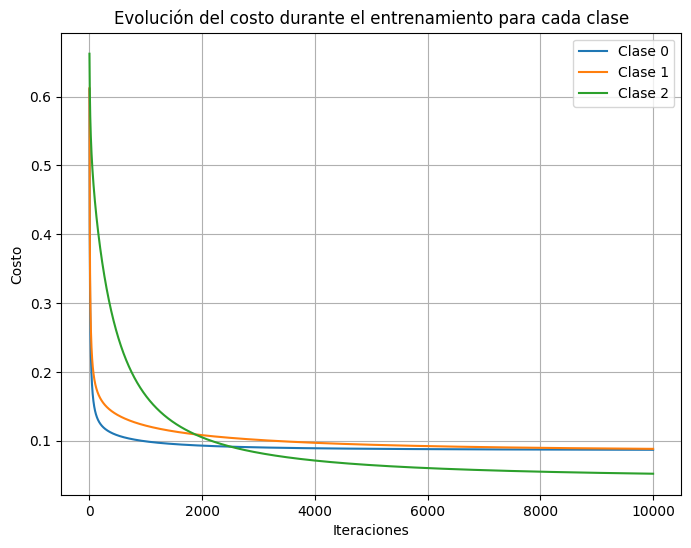

In [26]:
# Graficar los costos
plt.figure(figsize=(8, 6)) # Crear una figura para la gráfica con un tamaño de 8x6 pulgadas

# Para cada clase, grafica el costo en función de las iteraciones
for c in range(num_clases):
    # Accede al historial de costos para la clase c desde el diccionario de modelos
    cost_history = modelos[c]['cost_history']
    plt.plot(range(len(cost_history)), cost_history, label=f'Clase {c}') # Graficar el costo vs. iteraciones para la clase c

plt.xlabel('Iteraciones') # Etiqueta del eje x
plt.ylabel('Costo') # Etiqueta del eje y
plt.title('Evolución del costo durante el entrenamiento para cada clase') # Título de la gráfica
plt.legend() # Mostrar la leyenda para identificar cada clase en la gráfica
plt.grid(True) # Añadir una cuadrícula para facilitar la lectura de la gráfica
plt.show() # Mostrar la gráfica

# Función para Realizar Predicciones con un Modelo de Regresión Logística

La función predecir utiliza el conjunto de características X y el diccionario de modelos entrenados para predecir la clase de cada muestra.

Calcula las probabilidades de pertenencia a cada clase utilizando la función sigmoide y selecciona la clase con la mayor probabilidad como la predicción final.

 La función devuelve las predicciones como las probabilidades para cada clase.

In [27]:
def predecir(X, modelos):
    num_muestras = X.shape[0]  # Número de muestras en X
    num_clases = len(modelos)  # Número de clases (modelos) disponibles

    # Inicializamos una matriz para guardar las probabilidades para cada clase
    probabilidades = np.zeros((num_muestras, num_clases)) #Crea una matriz de ceros con dimensiones num_muestras por num_clases.

    # Calculamos las probabilidades para cada clase
    for c in range(num_clases):
       # Multiplicamos X por los parámetros del modelo para la clase c y aplicamos la función sigmoide
        probabilidades[:, c] = sigmoid(np.dot(X, modelos[c]['theta']))

    #Cada muestra se asigna a la clase con la mayor probabilidad
    predicciones = np.argmax(probabilidades, axis=1) # axis=1 indica que se debe buscar a lo largo de las columnas

    return predicciones, probabilidades


# Calcular la Precisión de los Modelos de Regresión Logística

La función calcular_precision_por_modelo evalúa la precisión de cada modelo en un conjunto de datos.

Para cada clase, convierte las probabilidades de predicción en predicciones binarias, compara estas predicciones con las etiquetas verdaderas, y calcula la precisión.

Finalmente, imprime la precisión de cada clase y devuelve un array con las precisiones de todos los modelos.

In [28]:
def calcular_precision_por_modelo(X, y_true, modelos):
    num_clases = len(modelos) # Número de clases (modelos)
    precisiones = np.zeros(num_clases) # Array para almacenar la precisión de cada clase

    # Para cada clase, calculamos la precisión
    for c in range(num_clases):
        # Crear etiquetas binarizadas para la clase actual
        y_bin = np.where(y_true == c, 1, 0)

        # Predecir las probabilidades de la clase actual
        _, probabilidades = predecir(X, modelos)

        # Convertir probabilidades a predicciones binarizadas
        predicciones_bin = (probabilidades[:, c] >= 0.5).astype(int) #Convierte las probabilidades en predicciones binarias. (Si prob. >= 0.5 predice 1; de lo contrario 0)

        # Calcular precisión
        precision = np.sum(predicciones_bin == y_bin) / len(y_bin) #Calcula la precisión comparando las predicciones binarias con las etiquetas binarias
        precisiones[c] = precision #Almacena la precisión calculada para la clase c

        print(f'Precisión del modelo para la clase {c}: {precision * 100:.2f}%') #Imprime la precisión del modelo para la clase actual en 2 decimales

    return precisiones


In [29]:
# Calcular la precisión de cada modelo
precisiones_por_modelo = calcular_precision_por_modelo(X_test_norm, y_test, modelos)

Precisión del modelo para la clase 0: 97.97%
Precisión del modelo para la clase 1: 98.39%
Precisión del modelo para la clase 2: 99.15%


# Precisión del modelo en el conjunto de prueba

### Función Softmax para Normalizar Puntajes de Clasificación

* La función softmax convierte todos los puntajes de clasificación en probabilidades que suman 1 para cada muestra

La función softmax hace que las probabilidades sumen 1 para representar el 100%. Esto significa que, para cada dato, el total de probabilidades entre todas las clases es el 100%, y cada clase tiene una probabilidad de ocurrir entre 0 y 1.

Por ejemplo, si después de aplicar softmax, una clase tiene una probabilidad de 0.7, significa que hay un 70% de probabilidad de que ese dato pertenezca a esa clase


In [30]:
def softmax(puntajes):
    # Restamos el valor máximo de cada fila para estabilidad numérica
    exp_puntajes = np.exp(puntajes - np.max(puntajes, axis=1, keepdims=True))
    # Normalizamos para que las probabilidades sumen 1
    probabilidades = exp_puntajes / np.sum(exp_puntajes, axis=1, keepdims=True)

    return probabilidades


### Función para Calcular Puntajes de Clasificación

**Puntajes**: Son números que indican qué tan bien se ajusta cada opción (o clase) a tus datos, pero estos números pueden ser difíciles de interpretar directamente.

**Softmax**: Convierte esos puntajes en probabilidades, que son valores entre 0 y 1 y suman 1 para cada dato. Esto significa que puedes ver claramente cuál es la opción más probable o adecuada para tus datos.

In [31]:
def calcular_puntajes(modelos, X):
    num_muestras = X.shape[0] # Número de muestras en el conjunto de datos
    num_clases = len(modelos) # Número de clases basadas en la cantidad de modelos

    # Inicializamos la matriz de puntajes
    puntajes = np.zeros((num_muestras, num_clases))

    # Calcular los puntajes para cada clase
    for c in range(num_clases):
        # Multiplicamos las características X por los parámetros theta del modelo para la clase c
        puntajes[:, c] = np.dot(X, modelos[c]['theta'])

    return puntajes


### Evaluación del Modelo con Softmax y Precisión en el Conjunto de Prueba

 Se calcula los puntajes para cada muestra en el conjunto de prueba, se aplica la función Softmax para convertir estos puntajes en probabilidades, y luego se realiza las predicciones finales seleccionando la clase con la mayor probabilidad.
 Finalmente, calcula y muestra la precisión del modelo comparando las predicciones con las etiquetas verdaderas del conjunto de prueba.

In [32]:
# Calcular los puntajes para el conjunto de prueba
puntajes_test = calcular_puntajes(modelos, X_test_norm)

# Aplicar softmax a los puntajes para obtener probabilidades
probabilidades_test = softmax(puntajes_test)

# Predicción final: seleccionar la clase con la mayor probabilidad
y_pred_final = np.argmax(probabilidades_test, axis=1)

# Imprimir las predicciones finales
print(f"Predicciones finales para el conjunto de prueba: {y_pred_final}")

# Calcular la precisión del modelo
precision = np.mean(y_pred_final == y_test) * 100
print(f"Precisión del modelo con Softmax en el conjunto de prueba: {precision:.2f}%")


Predicciones finales para el conjunto de prueba: [0 1 0 ... 1 2 0]
Precisión del modelo con Softmax en el conjunto de prueba: 97.98%


# **One vs ALL**

Se entrena un clasificador binario para cada clase en un problema de clasificación multiclase, utilizando el esquema One-vs-All. Para cada clase, el modelo binario se entrena mediante el descenso por gradiente y se optimizan los parámetros. Los parámetros y los costos finales se almacenan para cada clase y se devuelven al final.

In [33]:
# Función para clasificar en el esquema One-vs-All usando solo numpy

#alpha (tasa de aprendizaje) y num_iters (número de iteraciones) se establecen con valores predeterminado
def oneVsAll(X, y, num_labels, lambda_, alpha=0.1, num_iters=1000):
    m, n = X.shape # Obtiene el número de muestras (m) y el número de características (n) de la matriz X.
    all_theta = np.zeros((num_labels, n + 1))  # Inicializar matriz de parámetros
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar la columna de unos

    #Inicializa una lista para almacenar el historial de costos de cada clase durante el entrenamiento.
    all_cost_history = []

    #Itera sobre cada clase (c) desde 0 hasta num_labels - 1.
    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)  # Inicializar los parámetros theta
        y_c = (y == c).astype(int)  # Convertir las etiquetas para la clase actual

        # Ejecutar descenso por gradiente para obtener los parámetros optimizados y el historial de costos
        theta, cost_history = descensoGradiente(initial_theta, X, y_c, alpha, num_iters, lambda_)

        all_theta[c] = theta  # Guardar los parámetros optimizados para la clase actual
        all_cost_history.append(cost_history)  # Guardar el historial de costos

        # Imprimir solo el costo final después del entrenamiento
        print(f'Costo final para la clase {c}: {cost_history[-1]}')

    return all_theta, all_cost_history

In [34]:
# Parámetros para entrenamiento
num_labels = len(np.unique(y_train))  # Número de etiquetas/clases en tu dataset
lambda_ = 0.01  # Regularización

# Llamar a la función para entrenar con One-vs-All
all_theta, all_cost_history = oneVsAll(X_train_norm, y_train, num_labels, lambda_)

Costo final para la clase 0: 0.09545384778927511
Costo final para la clase 1: 0.0680983915294692
Costo final para la clase 2: 0.04731307530567458


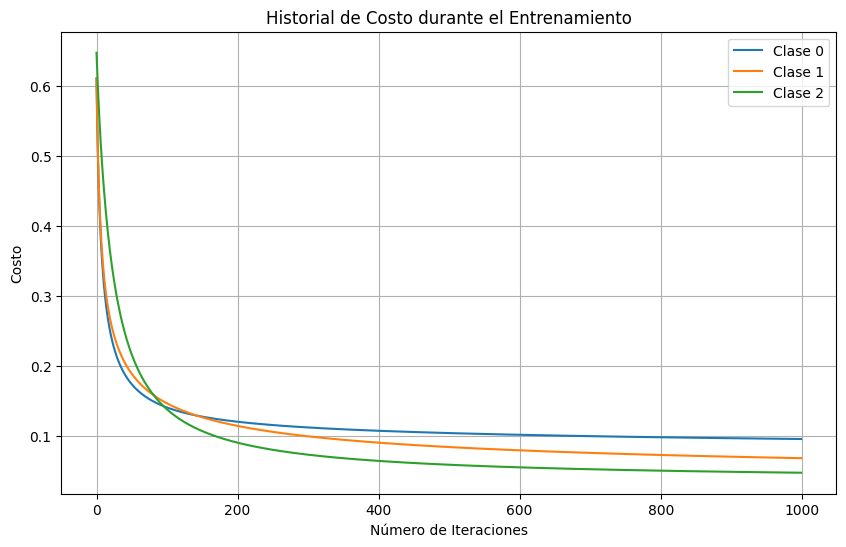

In [35]:
import matplotlib.pyplot as plt
import numpy as np


def plot_cost_history(all_cost_history):
    num_labels = len(all_cost_history)

    plt.figure(figsize=(10, 6))

    for c in range(num_labels):
        plt.plot(np.arange(len(all_cost_history[c])), all_cost_history[c], label=f'Clase {c}')

    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Costo')
    plt.title('Historial de Costo durante el Entrenamiento')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar el historial de costos
plot_cost_history(all_cost_history)


### **Función para Predecir Etiquetas en un Modelo de Clasificación One-vs-All**

Se divide un problema de clasificación multiclase en múltiples problemas de clasificación binaria.

La función recibe parámetros que incluyen los parámetros del modelo entrenado (all_theta) y las características de los datos (X). Agrega una columna de unos a X para incluir el término de sesgo, aplica la función sigmoide para obtener probabilidades de clase, y finalmente, usa argmax para seleccionar la clase con la mayor probabilidad para cada muestra.


In [36]:
def predictOneVsAll(all_theta, X):
    # Obtiene el número de muestras en X
    m = X.shape[0]

    # Obtiene el número de etiquetas (clases) del modelo
    num_labels = all_theta.shape[0]

    # Inicializa el vector de predicciones con ceros
    p = np.zeros(m)

    # Agrega una columna de unos a X para el término de intercepción (sesgo)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcula las probabilidades para cada clase usando la función sigmoide
    # `X.dot(all_theta.T)` multiplica las características de entrada por los parámetros del modelo
    # `sigmoid` transforma los puntajes en probabilidades
    # `np.argmax` selecciona la clase con la probabilidad más alta para cada muestra
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [37]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_pred_train = predictOneVsAll(all_theta, X_train_norm)
y_pred_test = predictOneVsAll(all_theta, X_test_norm)

### Calcular la Precisión del Modelo

In [38]:
# Función para calcular la precisión
def calcular_precision(y_true, y_pred):
    precision = np.mean(y_true == y_pred) * 100  # Calcula la precisión como el porcentaje de predicciones correctas
    return precision

def calcular_precision(y_true, y_pred):
    # Compara las etiquetas verdaderas (y_true) con las predicciones (y_pred)
    # np.mean(y_true == y_pred) calcula el porcentaje de coincidencias correctas.
    # Multiplicamos por 100 para obtener la precisión en porcentaje.
    precision = np.mean(y_true == y_pred) * 100
    return precision


In [39]:
# Calcular la precisión para el conjunto de entrenamiento y prueba
precision_train = calcular_precision(y_train, y_pred_train)
precision_test = calcular_precision(y_test, y_pred_test)

# Imprimir las precisiones calculadas en ambos conjuntos
print(f"Precisión del modelo en el conjunto de entrenamiento: {precision_train:.2f}%")
print(f"Precisión del modelo en el conjunto de prueba: {precision_test:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 98.06%
Precisión del modelo en el conjunto de prueba: 98.06%
